In [12]:
%matplotlib inline

# Travail Pratique 2 - Modèle de Prediction de la qualite d'un vin

L'objectif est de modéliser la qualité d'un vin sur la base des resultats de tests physico-chimiques. Pour cela nous allons utiliser 2 approches, une par la méthode de regression lineaire et l'autre par la méthode classification

Dans ce TP, nous allons apprendre comment:

- Extraire les données à partir d'un datahub distant

- Explorer des données pour des correlation eventuelles 

- Créer d'un modèle de regression linéaire

- Evaluer les métriques de regression

- Créer d'un modèle de classification 

- Evaluer les métriques de classification

- Enregistrer et partager le modèle a un tiers pour une utilisation future 

- Utiliser le modèle pour des prédictions sur des nouvelles données 

### Description des données

Les données inclus un échantillon de vin rouge du nord du Portugal et publiees dans le repertoire de données de l'University of California, Irvine. 

Attributs ou variables d'entree (resultats de tests physico-chimiques):
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (varie de 0 a 10)

L'attribut "quality" est la cible que l'on veut predire

Pour avoir plus d'informations sur les données, visiter https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [13]:
# Importer les librairies neccessaires pour la traitement et l'exploration des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Extraire les données

Extraire les données à partir d'un datahub distant https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

La méthode pandas read_csv() est decrite a l'adresse https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Faites attention au type de separateur utilisé.

In [4]:
# Completer le code ci-dessous
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [35]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
# Affichez le nombre d'instances de vins et le nombre d'attributs
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
dimension = df.shape
print("Nombre de lignes", dimension[0])
print("Nombre d'attributs", dimension[1])

Nombre de lignes 1599
Nombre d'attributs 12


In [ ]:
# Selectionnez les données d'entrées X (les 10 premières colonnes) et les données cibles Y (la dernière colone)
# Description du selecteur DataFrame.iloc https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

In [21]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

In [37]:
# Pour l'instant nous n'allons pas supprimer l'attribut 'density'
# Verifiez s'il y a des colonnes avec des valeurs manquantes dans le tableau des données
# La fonction suivante compte le nombre de valeur manquantes par colonne
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

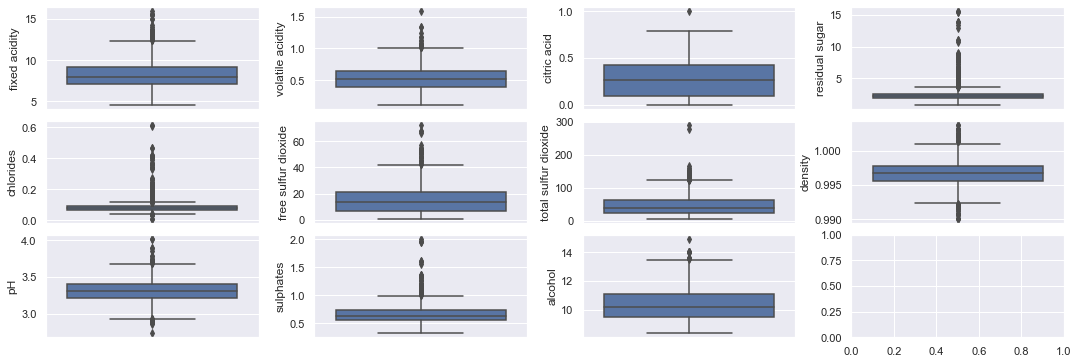

In [36]:
# Verifiez s'il y a des valeurs anormales (outliers en anlgais) dans le tableau des données avec la fonction boxplot
# Pour l'instant nous n'allons pas les supprimer 
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15, 5))
ax = ax.flatten()
index = 0
for column in df.columns:
  if column != 'quality':
    sns.boxplot(y=column, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

### Exploration des données pour detecter des tendances

In [15]:
# completez le code ci-dessous
correlation = df.corr()
print("Tableau du degré de correlation entre les differents attributs")
correlation

Tableau du degré de correlation entre les differents attributs


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Tableau du degré de correlation entre les differents attributs avec seaborn


<AxesSubplot:>

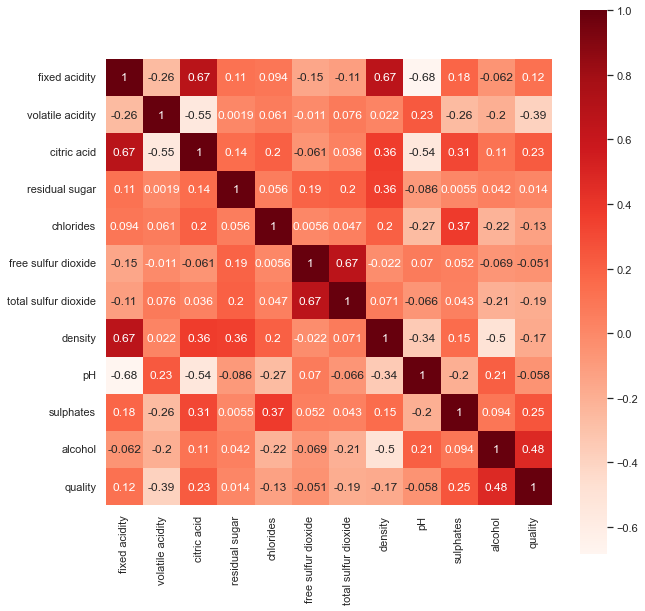

In [31]:
# On peut obtenir une meilleur visualisation avec la librairie seaborn
fig = plt.subplots(figsize=(10,10))
print("Tableau du degré de correlation entre les differents attributs avec seaborn")
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Reds')

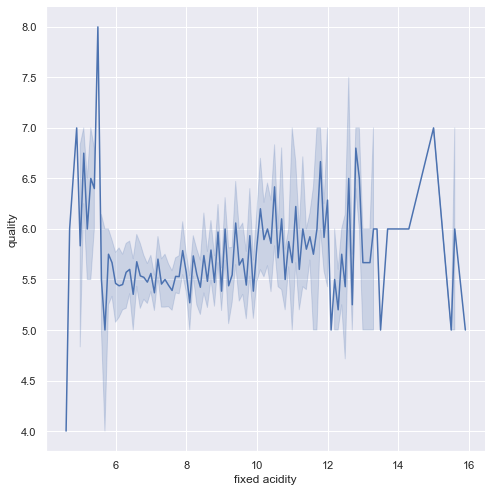

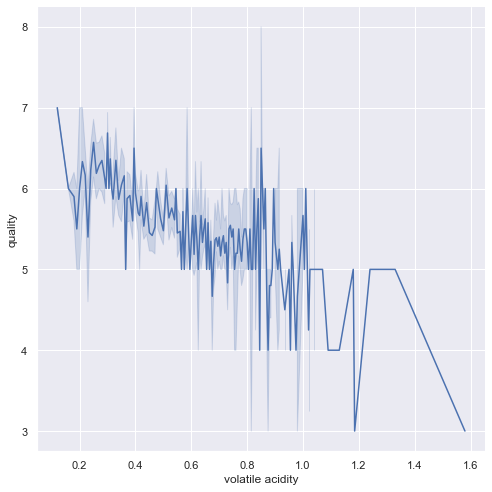

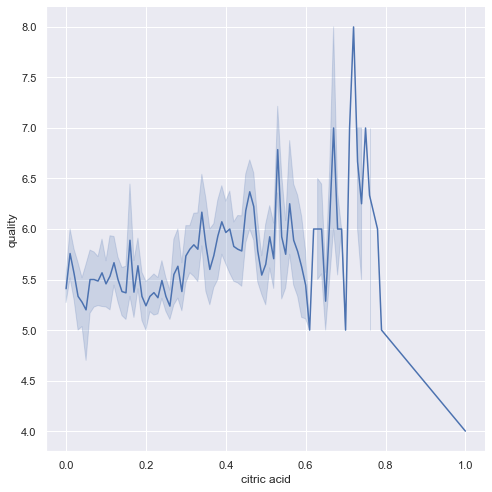

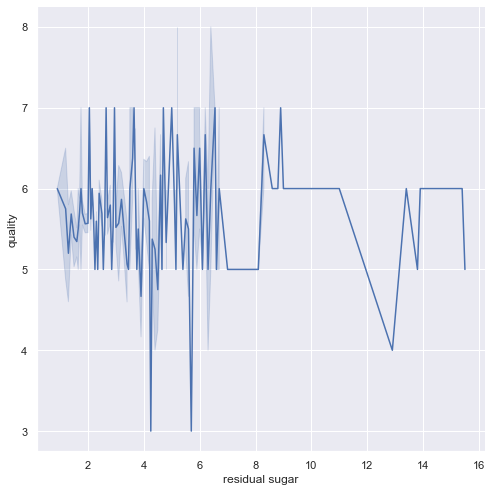

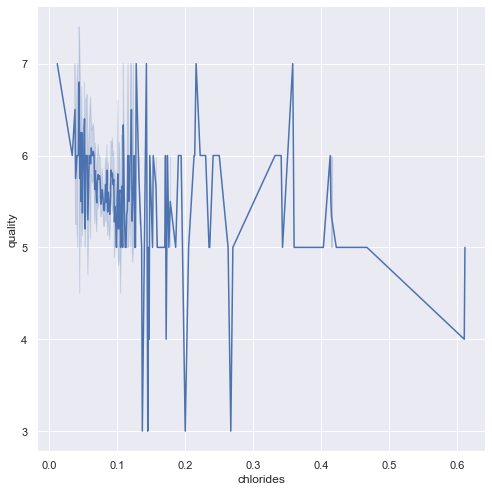

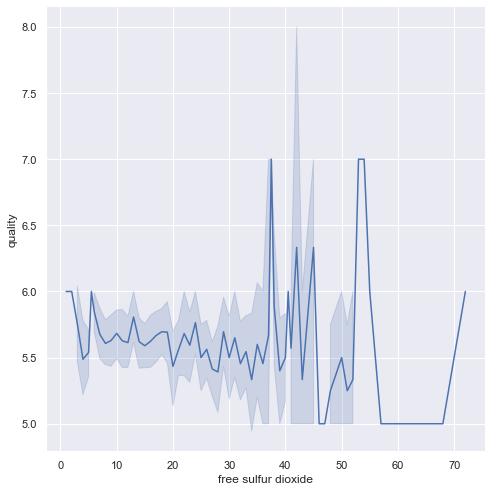

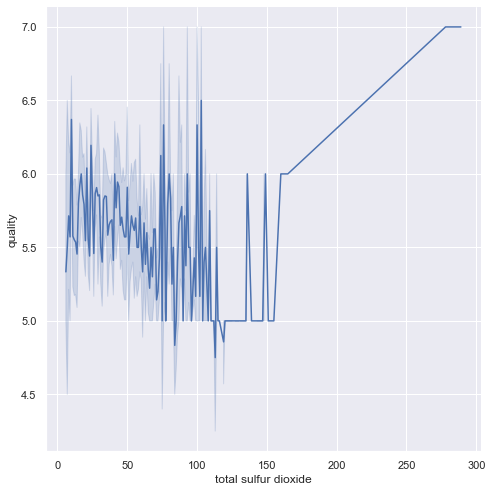

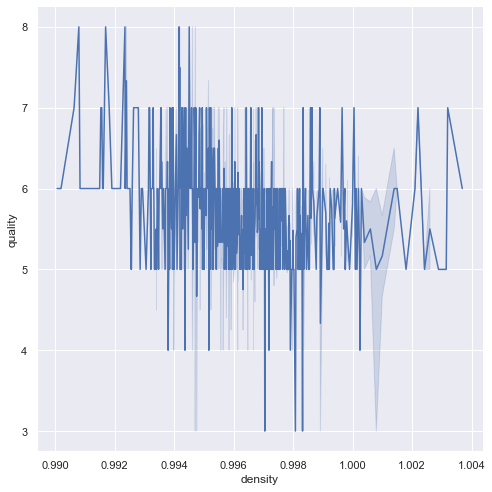

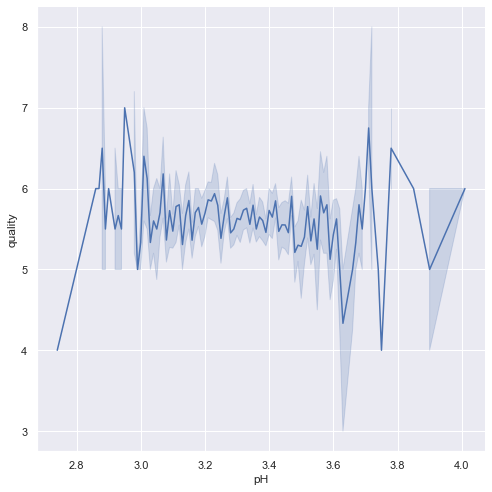

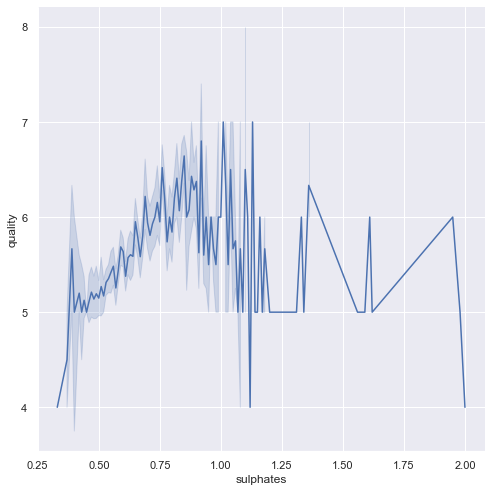

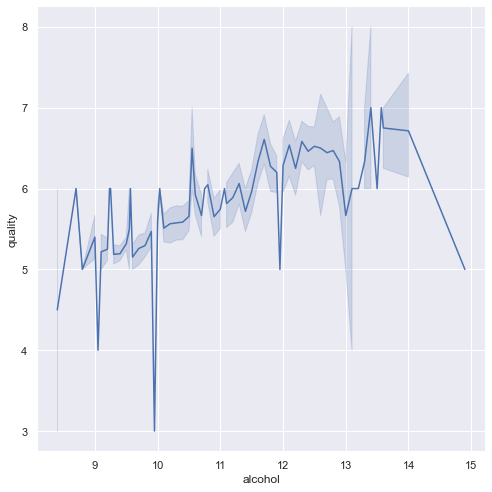

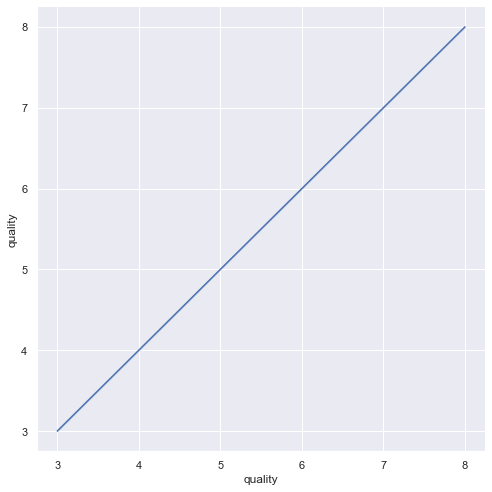

In [34]:
# Pour chacun des attributs, affichez les diagrammes de Y en fonction de cet attribut
attributs = df.columns.values
for attribut in attributs:
    sns.set()
    sns.relplot(data=df,x=df[attribut],y='quality', kind='line',height=7,aspect=1)
    

Y'en a-t-il parmi les 11 courbes qui presentent un certain degre de correlation (negative ou positive) avec la variable cible Y(qualite) ? Lesquelles ? 

Double-cliquez sur ce texte pour editer votre reponse et appuyer sur le bouton "Run".


### Creation du modèle

In [14]:
# Importez les librairies neccessaires pour l'entrainement du modèle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
# Completer les lignes de code ci-dessous (...)
# Scindez les donnes en 2 ensembles, dont 80% pour l'entrainement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=..., random_state=4)

# Selectionnez l'algorithme LinearRegression
lr = LinearRegression()

# Learn the digits on the train subset
lr.fit(X_train, y_train)

# Predict the value of the digit on the test subset
y_pred = lr.predict(X_test)

In [16]:
accuracy = lr.score(X_test, y_test)
print(accuracy)

0.34466249068921806


In [17]:
rmse_linear = mean_squared_error(y_test,y_pred)
print(rmse_linear)

0.406632828667907


In [ ]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [ ]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

In [ ]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

In [ ]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))